In [1]:
import pandas as pd
import quandl

In [2]:
start = pd.to_datetime('2008-01-01')
end = pd.to_datetime('2021-10-01')

In [3]:
# It's AAPL.11 because 11 stands for column 11 which is the adjusted close column
micro = quandl.get('WIKI/MSFT.4',start_date=start,end_date=end,collapse='monthly')
cisco = quandl.get('WIKI/CSCO.4',start_date=start,end_date=end,collapse='monthly')
ibm = quandl.get('WIKI/IBM.4',start_date=start,end_date=end,collapse='monthly')
amzn = quandl.get('WIKI/AMZN.4',start_date=start,end_date=end,collapse='monthly')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
micro

,Close
Date,
2008-01-31,32.6000
2008-02-29,27.1999
2008-03-31,28.3800
2008-04-30,28.5200
2008-05-31,28.3200
...,...
2017-11-30,84.1700
2017-12-31,85.5400
2018-01-31,95.0100


In [6]:
micro.iloc[0]

Close    32.6
Name: 2008-01-31 00:00:00, dtype: float64

In [7]:
micro.iloc[0]['Close']

32.6

In [8]:
# Normalized return = cumulative daily return
for stock_df in (micro,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Close'] / stock_df.iloc[0]['Close']

In [9]:
micro.head()

,Close,Normed Return
Date,,
2008-01-31,32.6000,1.000000
2008-02-29,27.1999,0.834353
2008-03-31,28.3800,0.870552
2008-04-30,28.5200,0.874847
2008-05-31,28.3200,0.868712


In [10]:
micro.tail()

,Close,Normed Return
Date,,
2017-11-30,84.17,2.581902
2017-12-31,85.54,2.623926
2018-01-31,95.01,2.914417
2018-02-28,93.77,2.876380
2018-03-31,89.47,2.744479


In [11]:
stocks_norm = pd.concat([micro['Close'],cisco['Close'],ibm['Close'],amzn['Close']],axis=1)
stocks_norm.columns = ['micro','cisco','ibm','amzn']

In [48]:
import seaborn as sns

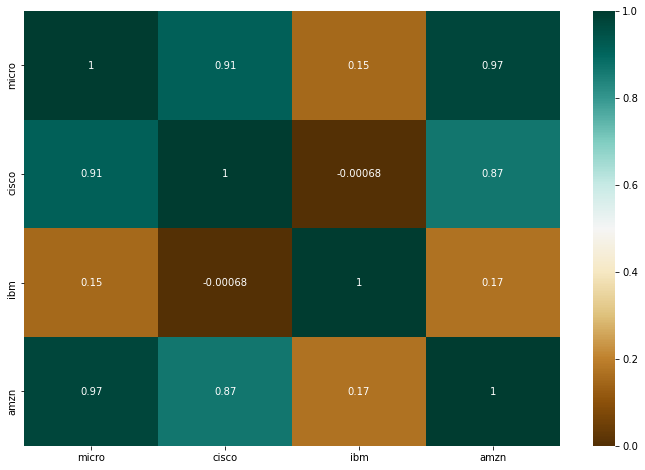

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(stocks_norm.corr(),annot=True,cmap='BrBG');
plt.savefig('corr.png')

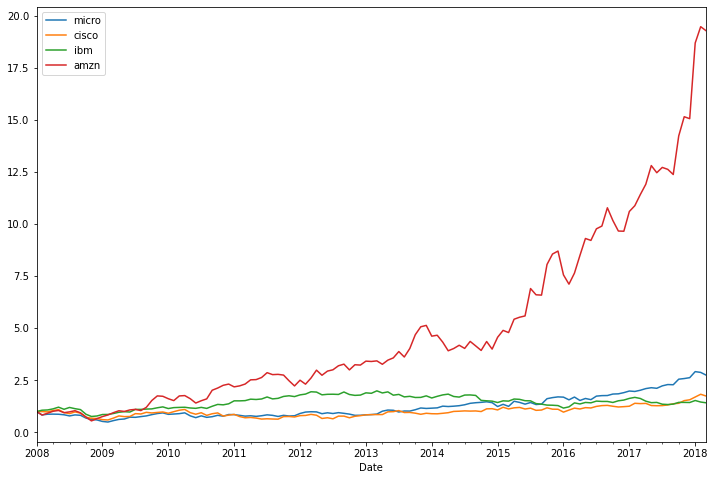

In [50]:
stock_normed = stocks_norm/stocks_norm.iloc[0]
stock_normed.plot(figsize=(12,8));
plt.savefig('stock_normed.png')

In [13]:
for stock_df, allo in zip((micro,cisco,ibm,amzn),[.3,.4,.2,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [14]:
micro.head()

,Close,Normed Return,Allocation
Date,,,
2008-01-31,32.6000,1.000000,0.300000
2008-02-29,27.1999,0.834353,0.250306
2008-03-31,28.3800,0.870552,0.261166
2008-04-30,28.5200,0.874847,0.262454
2008-05-31,28.3200,0.868712,0.260613


In [15]:
micro.tail()

,Close,Normed Return,Allocation
Date,,,
2017-11-30,84.17,2.581902,0.774571
2017-12-31,85.54,2.623926,0.787178
2018-01-31,95.01,2.914417,0.874325
2018-02-28,93.77,2.876380,0.862914
2018-03-31,89.47,2.744479,0.823344


In [16]:
for stock_df in (micro,cisco,ibm,amzn):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [17]:
micro.head()

,Close,Normed Return,Allocation,Position Values
Date,,,,
2008-01-31,32.6000,1.000000,0.300000,300000.000000
2008-02-29,27.1999,0.834353,0.250306,250305.828221
2008-03-31,28.3800,0.870552,0.261166,261165.644172
2008-04-30,28.5200,0.874847,0.262454,262453.987730
2008-05-31,28.3200,0.868712,0.260613,260613.496933


In [18]:
all_pos_vals = [micro['Position Values'],cisco['Position Values'],
               ibm['Position Values'],amzn['Position Values']]

portfolio_val = pd.concat(all_pos_vals,axis=1)

In [19]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2008-01-31,300000.000000,400000.000000,200000.000000,100000.000000
2008-02-29,250305.828221,398204.081633,212603.865185,82972.972973
2008-03-31,261165.644172,393306.122449,214993.931472,91763.191763
2008-04-30,262453.987730,418612.244898,225375.781906,101196.911197
2008-05-31,260613.496933,436244.897959,241676.780879,105045.045045


In [20]:
portfolio_val.columns = ['MSFT Pos', 'CISCO Pos','IBM Pos','AMZN Pos']

In [21]:
portfolio_val

,MSFT Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2008-01-31,300000.000000,400000.000000,200000.000000,1.000000e+05
2008-02-29,250305.828221,398204.081633,212603.865185,8.297297e+04
2008-03-31,261165.644172,393306.122449,214993.931472,9.176319e+04
2008-04-30,262453.987730,418612.244898,225375.781906,1.011969e+05
2008-05-31,260613.496933,436244.897959,241676.780879,1.050450e+05
...,...,...,...,...
2017-11-30,774570.552147,608979.591837,287498.832975,1.514479e+06
2017-12-31,787177.914110,625306.122449,286471.851368,1.505109e+06
2018-01-31,874325.153374,678204.081633,305667.071235,1.868275e+06


In [22]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [23]:
portfolio_val.head()

,MSFT Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2008-01-31,300000.000000,400000.000000,200000.000000,100000.000000,1.000000e+06
2008-02-29,250305.828221,398204.081633,212603.865185,82972.972973,9.440867e+05
2008-03-31,261165.644172,393306.122449,214993.931472,91763.191763,9.612289e+05
2008-04-30,262453.987730,418612.244898,225375.781906,101196.911197,1.007639e+06
2008-05-31,260613.496933,436244.897959,241676.780879,105045.045045,1.043580e+06


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

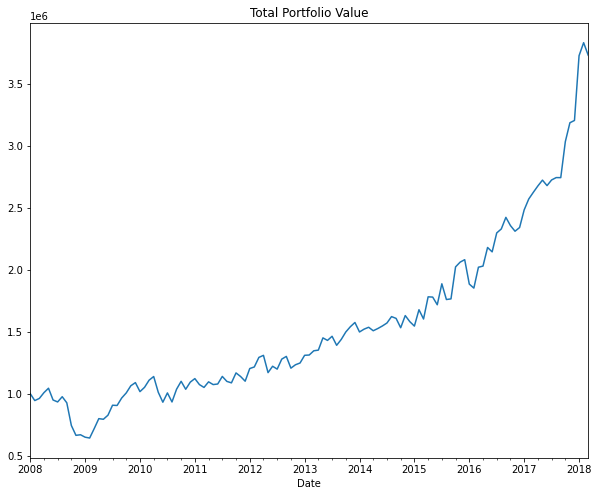

In [25]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value');

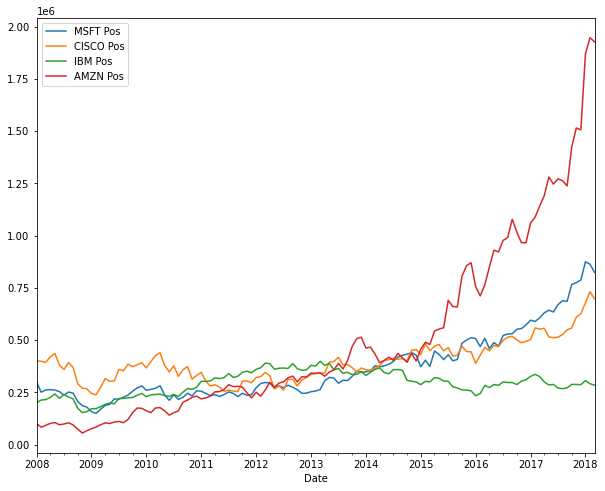

In [47]:
portfolio_val.drop(['Total Pos','Daily Return'],axis=1).plot(kind='line',figsize=(10,8));
plt.savefig('port_return_chart.png')

## Portfolio Stats

In [27]:
portfolio_val.head()

,MSFT Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2008-01-31,300000.000000,400000.000000,200000.000000,100000.000000,1.000000e+06
2008-02-29,250305.828221,398204.081633,212603.865185,82972.972973,9.440867e+05
2008-03-31,261165.644172,393306.122449,214993.931472,91763.191763,9.612289e+05
2008-04-30,262453.987730,418612.244898,225375.781906,101196.911197,1.007639e+06
2008-05-31,260613.496933,436244.897959,241676.780879,105045.045045,1.043580e+06


In [28]:
portfolio_val.tail()

,MSFT Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2017-11-30,774570.552147,608979.591837,287498.832975,1.514479e+06,3.185528e+06
2017-12-31,787177.914110,625306.122449,286471.851368,1.505109e+06,3.204065e+06
2018-01-31,874325.153374,678204.081633,305667.071235,1.868275e+06,3.726472e+06
2018-02-28,862914.110429,731102.040816,290971.898049,1.946525e+06,3.831513e+06
2018-03-31,823343.558282,696816.326531,283652.320045,1.926705e+06,3.730517e+06


In [29]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change()

In [30]:
portfolio_val.head()

,MSFT Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2008-01-31,300000.000000,400000.000000,200000.000000,100000.000000,1.000000e+06,NaN
2008-02-29,250305.828221,398204.081633,212603.865185,82972.972973,9.440867e+05,-0.055913
2008-03-31,261165.644172,393306.122449,214993.931472,91763.191763,9.612289e+05,0.018157
2008-04-30,262453.987730,418612.244898,225375.781906,101196.911197,1.007639e+06,0.048282
2008-05-31,260613.496933,436244.897959,241676.780879,105045.045045,1.043580e+06,0.035669


In [31]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [32]:
portfolio_val.head()

,MSFT Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2008-01-31,300000.000000,400000.000000,200000.000000,100000.000000,1.000000e+06,NaN
2008-02-29,250305.828221,398204.081633,212603.865185,82972.972973,9.440867e+05,-0.055913
2008-03-31,261165.644172,393306.122449,214993.931472,91763.191763,9.612289e+05,0.018157
2008-04-30,262453.987730,418612.244898,225375.781906,101196.911197,1.007639e+06,0.048282
2008-05-31,260613.496933,436244.897959,241676.780879,105045.045045,1.043580e+06,0.035669


In [51]:
portfolio_val.tail(10)

,MSFT Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2017-06-30,634325.153374,511020.408163,287237.419475,1.245817e+06,2.678400e+06,-0.016216
2017-07-31,669202.453988,513469.387755,270133.507609,1.271274e+06,2.724079e+06,0.017055
2017-08-31,688067.484663,525877.551020,267071.235179,1.262033e+06,2.743050e+06,0.006964
2017-09-30,685490.797546,549061.224490,270899.075717,1.237259e+06,2.742710e+06,-0.000124
2017-10-31,765460.122699,557551.020408,287666.884511,1.422497e+06,3.033175e+06,0.105904
2017-11-30,774570.552147,608979.591837,287498.832975,1.514479e+06,3.185528e+06,0.050229
2017-12-31,787177.914110,625306.122449,286471.851368,1.505109e+06,3.204065e+06,0.005819
2018-01-31,874325.153374,678204.081633,305667.071235,1.868275e+06,3.726472e+06,0.163045
2018-02-28,862914.110429,731102.040816,290971.898049,1.946525e+06,3.831513e+06,0.028188


In [34]:
portfolio_val['Daily Return'].mean()

0.012435622943095774

In [35]:
portfolio_val['Daily Return'].std()

0.05641056856877906

<AxesSubplot:ylabel='Frequency'>

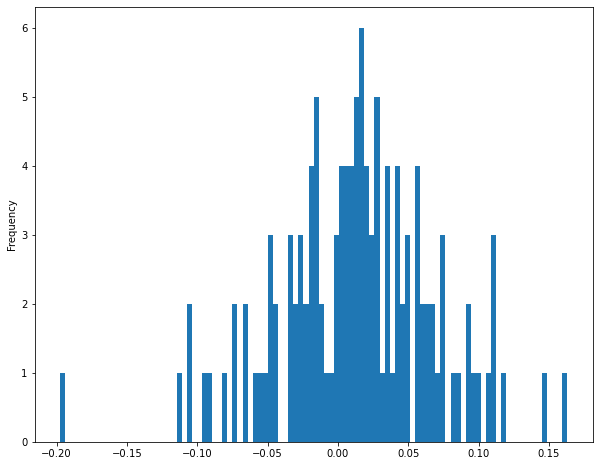

In [36]:
portfolio_val['Daily Return'].plot(kind='hist',bins=100,figsize=(10,8))

<AxesSubplot:ylabel='Density'>

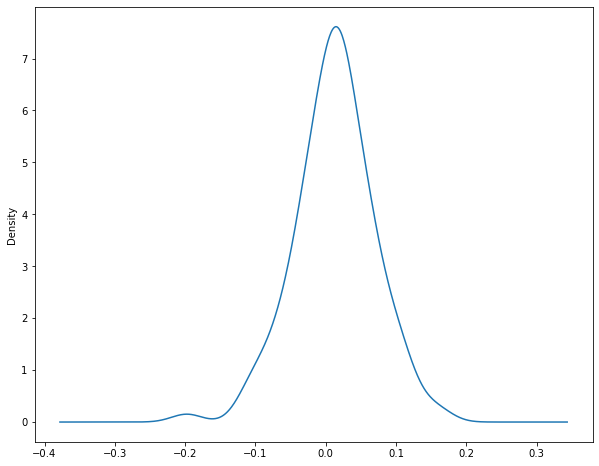

In [37]:
portfolio_val['Daily Return'].plot(kind='kde',figsize=(10,8))

<AxesSubplot:ylabel='Density'>

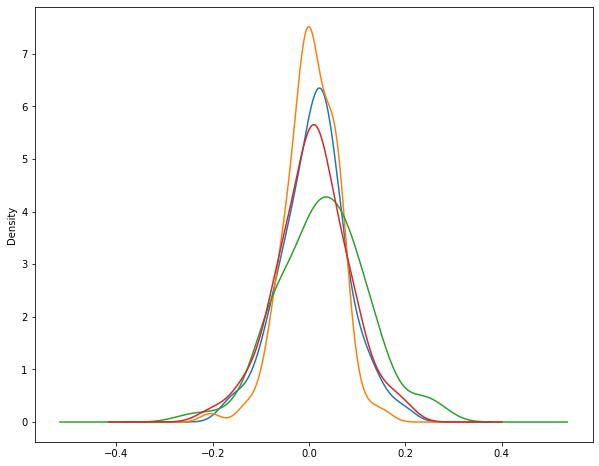

In [38]:
micro['Close'].pct_change(1).plot(kind='kde',figsize=(10,8))
ibm['Close'].pct_change(1).plot(kind='kde')
amzn['Close'].pct_change(1).plot(kind='kde')
cisco['Close'].pct_change(1).plot(kind='kde')

In [39]:
cumulative_return = 100*(portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0]-1)

In [40]:
cumulative_return

273.0517481562911

In [41]:
# Sharp Ratio
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [42]:
SR

0.22044845954590114

In [43]:
# Have to multiply by k number sqt as SR was meant for annual but we are looking for daily
# ASR = Annualised Sharp Ratio
ASR = (252**0.5)*SR

In [44]:
ASR

3.499510805194424

In [45]:
import math

In [46]:
math.sqrt(252)*SR

3.499510805194424